In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wine_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline']
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = wine_names) 
wine_df = pd.DataFrame(wine_data)
wine_df.Class = wine_df.Class - 1

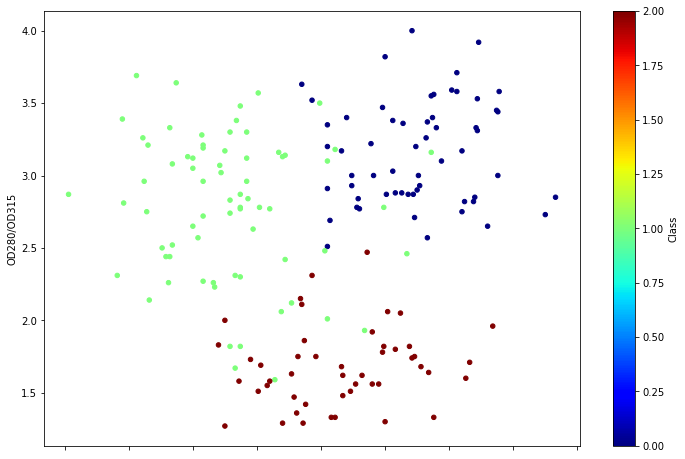

In [3]:
wine_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', c= 'Class', figsize=(12,8), colormap='jet')

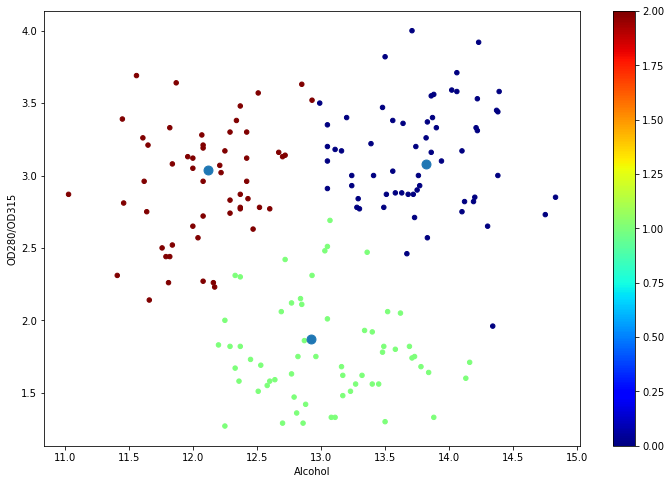

In [4]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(wine_df.iloc[:,[12,1]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(wine_df.iloc[:,[12,1]].columns.values))
fig, ax = plt.subplots(1, 1)
wine_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', ax = ax,  s = 80, mark_right=False)

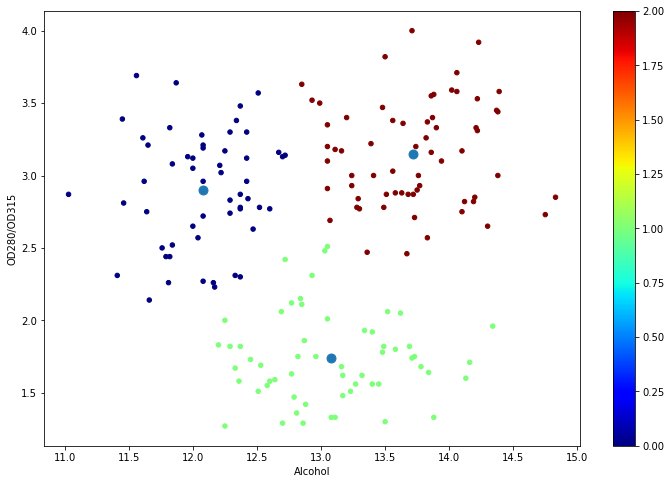

In [5]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 100, random_state = 5).fit(wine_df.iloc[:,[12,1]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(wine_df.iloc[:,[12,1]].columns.values))
fig, ax = plt.subplots(1, 1)
wine_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', ax = ax,  s = 80, mark_right=False)

일반적으로 기계 학습 및 데이터 분석에서 클러스터링 알고리즘은 데이터 세트 내에 존재하는 고유 구조, 그룹을 발견하고 학습하는 도구 중 하나이다.
데이터 세트의 크기로 인해 데이터 과학자가 이러한 패턴을 직접 관찰할 수 없는 경우가 많다. 
지난 반세기 동안의 엄청난 계산 능력의 성장으로 인해, 컴퓨터는 이제 이러한 패턴 인식을 수행할 수 있게 되었다.
k-means 군집화라고 알려진 그러한 알고리즘 중 하나는 1957년에 처음 제안되었다. 이 알고리즘은 군집 분석에서 기초하며, 그 특징의 유사성을 바탕으로 관측 데이터를 군집으로 그룹화하려고 한다. k-means 알고리즘은 몇 가지 이점을 제공한다. Python에서는 몇 줄의 코드만 필요하므로 비교적 쉽게 이해하고 구현할 수 있다. 또한 밀도가 다양한 균일하게 형성되는 군집에도 적합하다. 하지만 항상 잘 작동하는 것은 아니다. 차원의 수가 증가함에 따라 완벽한 clusters는 점점 더 어려워진다. 또한 모양이 균일하지 않은 군집에는 어려움이 있다.